In [1]:
import os
os.chdir('/home/haman/layers56/optimization')

import pickle
import numpy
import math
import json
import subprocess

import matplotlib.pyplot as plt
from matplotlib import colors as plt_colors
from matplotlib import cm
import matplotlib as mpl

from evaluator import define_parameters, define_fitness_calculator

mpl.rcParams['mathtext.default'] = 'regular'
cmap = mpl.colormaps['viridis']

In [ ]:
# Runs with param-optim
config_optimisation = "./param-optim/config_optimisation"

################################################
# 1st run (LGN-->L4 connections parameters fixed)
################################################
# Total 26 generations!!! :-)

# First 12 generations before stopping
optimization_folder = "20250101-232628_Optimization_Archived" 

# Continuation of the above:
optimization_folder = "20250101-232628_Optimization"  # here is the checkpoint
# optimization_folder = "20250105-133504_Optimization"  # here are the logs

################################################
# 2nd run (LGN-->L4 connections varied, SpontActivity interval)
################################################
optimization_folder = "20250113-102906_Optimization"  # here is the checkpoint

################################################
# 3nd run (Size tuning updated)
################################################
optimization_folder = "20250121-153442_Optimization"  # here is the checkpoint

################################################
# 4th run (Synchronization updated - radius restriction)
################################################
# optimization_folder = ""  # here is the checkpoint
optimization_folder = "20250212-154544_Optimization"

################################################
# Split longrange/short-range connections
################################################
# optimization_folder = "20250314-233054_Optimization"

################################################
# Split longrange/short-range connections - attempt 2
################################################
# optimization_folder = "20250328-192103_Optimization"

################################################
# Split longrange/short-range connections - attempt 3
################################################
optimization_folder = "20250330-161635_Optimization"

################################################
# Split longrange/short-range connections - start from previous results
###############################################
optimization_folder = "20250401-101958_Optimization"

################################################
# Split longrange/short-range connections - start from previous results
###############################################

config_optimisation = "./param-split/config_optimisation"
optimization_folder = "20250617-145255_Optimization"


config_optimisation = "./param-split/config_optimisation"
optimization_folder = "20250624-151801_Optimization"

model = 'LSV1M_split_ee'  
config_optimisation = f'/home/haman/layers56/{model}/param_optim/config_optimisation'

config_optimisation = "./param-split/config_optimisation"
optimization_folder = "20250701-111155_Optimization"

checkpoint_path = f"./{optimization_folder}/opt_check.pkl"


In [ ]:
# Issues: 
#   synchrony
#   size tuning

# suggestions:
#   split long-range/short-range connections


################################################
# Full split of long-range/short-range connections
###############################################
config_optimisation = "./param-split/config_optimisation"
optimization_folder = "20250630-172308_Optimization"


In [2]:
os.chdir('/home/haman/layers56/')
!pwd

/home/haman/layers56


In [3]:
model_name = 'LSV1M_split_full'
optimization_folder = f'{model_name}/20250704-222215_Optimization'

config_optimisation = f"{model_name}/param_optim/config_optimisation"
checkpoint_path = f"{optimization_folder}/opt_check.pkl"

In [4]:
with open(config_optimisation) as f:
    opt_config = json.load(f)
fitness_calculator = define_fitness_calculator(opt_config)
params = define_parameters(opt_config)
param_names = [p.name for p in params]
scores_names = [target.name for target in fitness_calculator.objectives]

In [5]:
with open(checkpoint_path, "rb") as fp:
    run = pickle.load(fp, encoding="latin1")

In [9]:
run.keys()

dict_keys(['population', 'generation', 'halloffame', 'history', 'logbook', 'rndstate', 'np_rndstate', 'CMA_es', 'param_names'])

In [39]:
run['generation']

84

In [65]:
dir(run['history'].genealogy_history[1])

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ps',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'fitness',
 'history_index',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [54]:
run["halloffame"][0].fitness.values

(0.0,
 0.0,
 1.50299803217965,
 0.0,
 0.31054239567036235,
 0.0,
 1.4514251764487773,
 0.4215315419960053,
 0.1345647389446452,
 0.3093146139356532,
 0.8270107255103298,
 1.2228772809815476,
 0.0,
 0.0,
 0.0,
 array(0.28024288) * dimensionless,
 array(0.36855981) * dimensionless,
 array(0.78468757) * dimensionless,
 array(0.43434922) * dimensionless,
 array(1.42697079) * dimensionless,
 array(0.02011148) * dimensionless,
 array(0.06151784) * dimensionless,
 array(0.49163611) * dimensionless,
 array(0.26470588) * dimensionless,
 0.3742331288343559)

# Plot best solution

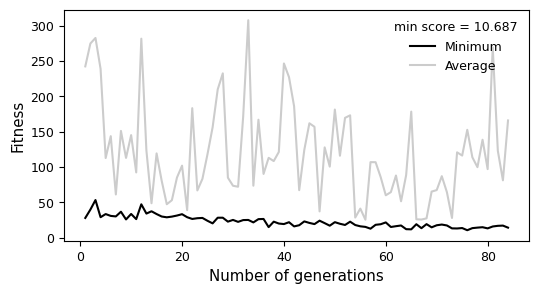

In [55]:
plt.rcParams.update({'font.size': 9})
fig, axs = plt.subplots(1, figsize=(6, 3), squeeze=False)

axs[0, 0].plot(run["logbook"].select("gen"), run["logbook"].select("min"), label="Minimum", c="black")
axs[0, 0].plot(run["logbook"].select("gen"), run["logbook"].select("avg"), label="Average", c="gray", alpha=0.4)

axs[0, 0].set_xlabel("Number of generations", size="large")
axs[0, 0].set_ylabel("Fitness", size="large")

legend_text = "\n".join((f"min score = {min(run['logbook'].select('min')):.3f}",))
axs[0, 0].legend(title=legend_text, loc="upper right", frameon=False)

plt.savefig(f"./{optimization_folder}/evo_fitness.png", dpi=100, bbox_inches="tight", transparent=True)
plt.show()

In [56]:
print("Sigma: ", run["CMA_es"].sigma)
print("Best model:")
print("{")
for p, v in zip(param_names, run["halloffame"][0]):
    # print(f'    "{p}": [{round(v, 8)}],')
    print(f'    "{p}": {v},')
print("}")

print(run["halloffame"][0])

Sigma:  0.059387416293599116
Best model:
{
    "density_frac": 0.08952512709687636,
    "sheets.l4_cortex_exc.params.cell.params.tau_syn_E": 3.1803170733266812,
    "sheets.l4_cortex_exc.params.cell.params.tau_syn_I": 8.851970939449238,
    "sheets.l4_cortex_exc.params.cell.params.tau_m": 10.72473469161203,
    "sheets.l4_cortex_exc.params.cell.params.cm": 0.03388577911118321,
    "sheets.l4_cortex_exc.params.cell.params.v_rest": -78.92236311429451,
    "sheets.l4_cortex_exc.params.cell.params.v_thresh": -57.39043049212537,
    "sheets.l4_cortex_inh.params.cell.params.cm": 0.030047622695782324,
    "sheets.l4_cortex_inh.params.cell.params.tau_m": 7.758926570880877,
    "sheets.l4_cortex_inh.params.cell.params.v_rest": -70.06323906944469,
    "sheets.l4_cortex_inh.params.cell.params.v_thresh": -57.65131880391821,
    "sheets.l4_cortex_exc.K": 927.8528271140426,
    "sheets.l23_cortex_exc.K": 2061.187549792707,
    "sheets.l4_cortex_exc.feedback_conn_ratio": 0.16038739390576506,
    "she

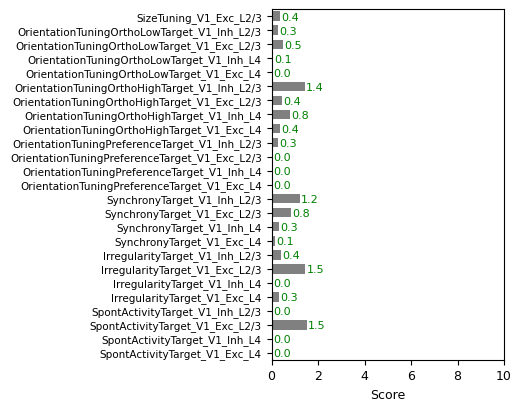

In [57]:
score = [float(f) for f in run["halloffame"][0].fitness.values]
pos = [*range(len(score))]

fig, axs = plt.subplots(1, figsize=(3, 0.8 + 0.150 * len(pos)), squeeze=False)

axs[0, 0].barh(pos, score, height=0.7, align="center", color="gray")

for p, s in zip(pos, score):
    if s > 2:
        axs[0, 0].text(s + 0.05, p - 0.25, s="{:.1f}".format(s), color="red", fontsize=8)
    if s < 2:
        axs[0, 0].text(s + 0.05, p - 0.25, s="{:.1f}".format(s), color="green", fontsize=8)

axs[0, 0].set_xlabel("Score")

axs[0, 0].set_yticks(pos)
axs[0, 0].set_yticklabels(scores_names, size="small")

axs[0, 0].set_xlim(0, 10)
axs[0, 0].set_ylim(-0.5, len(pos) - 0.5)

plt.savefig(f"./{optimization_folder}/scores.png", dpi=100, bbox_inches="tight", transparent=True)
plt.show()

In [14]:
sum(score)



11.926036911784632

# Plot correlation between parameters and scores

In [15]:
# This is an approximation since the other parameters are not fix
from scipy.stats import pearsonr

n_params = len(run["halloffame"][0])
n_targets = len(run["halloffame"][0].fitness.values)

corrs = []
for idx_param in range(n_params):

    for idx_targets in range(n_targets):

        X = []
        Y = []

        for idx_pop in run['history'].genealogy_history:
            ind = run['history'].genealogy_history[idx_pop]
            scores = numpy.array([float(v) for v in ind.fitness.values])
            X.append(ind[idx_param])
            Y.append(scores[idx_targets])

        corrs.append(pearsonr(X, Y)[0])

        """if "L23ExcL23Exc" in  param_names[idx_param]:
            plt.scatter(X, Y)
            plt.title(scores_names[idx_targets])
            plt.show()"""

corrs = numpy.array(corrs).reshape(n_params, n_targets)

ValueError: The number of FixedLocator locations (37), usually from a call to set_ticks, does not match the number of labels (36).

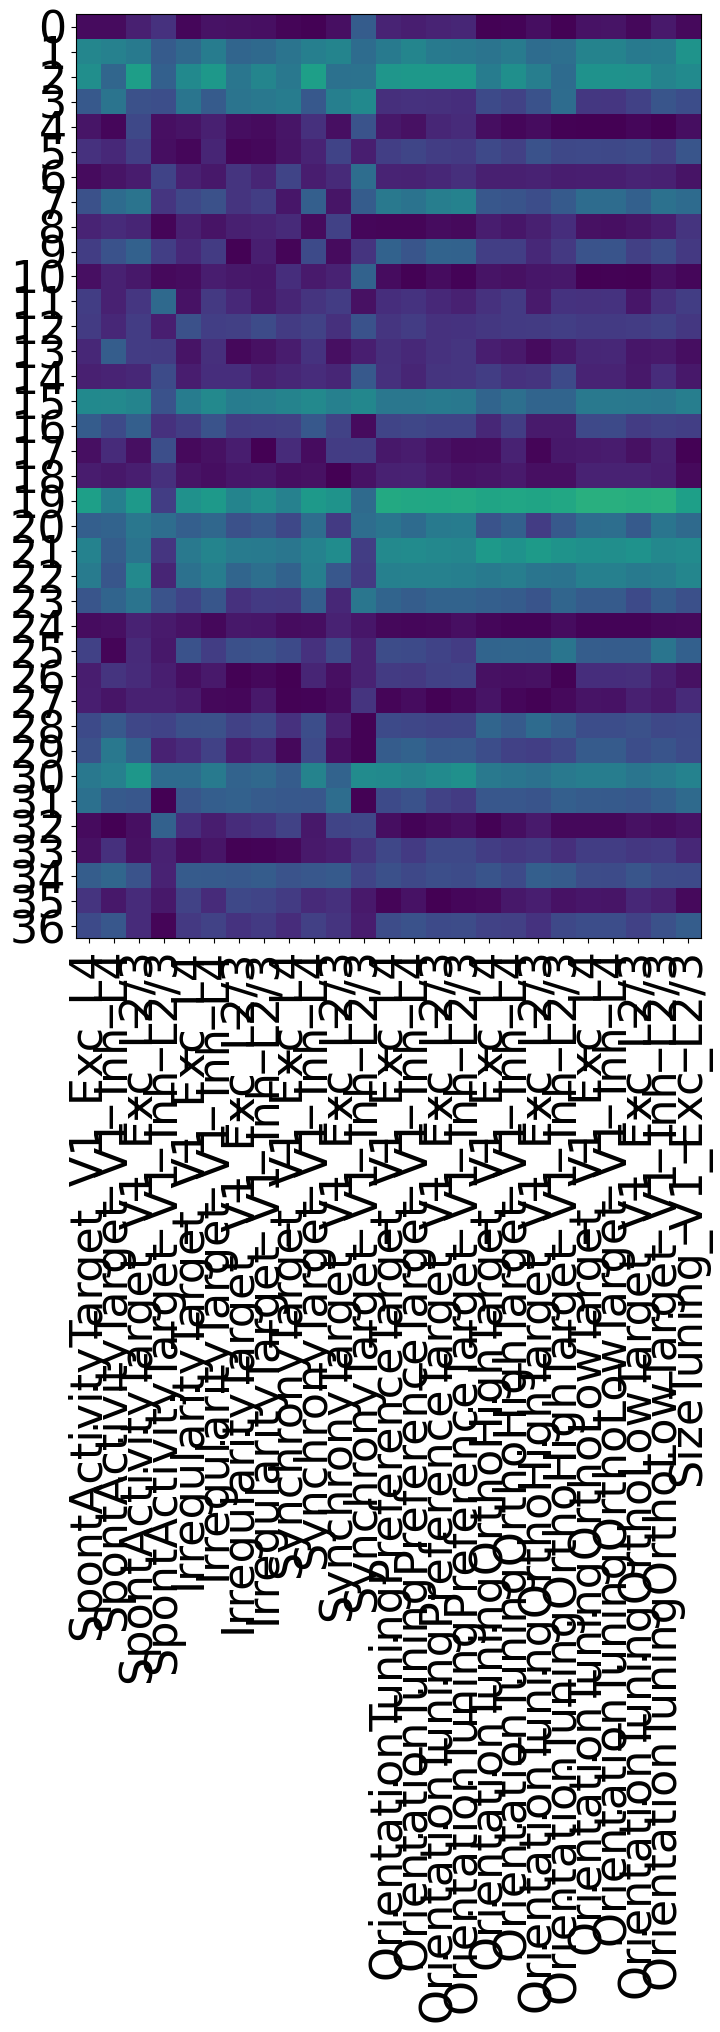

In [86]:
# To get more readable plot, increase the font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(1, figsize=(24, 12))

# fig, ax = plt.subplots(1, figsize=(6, 3))

ax.imshow(numpy.abs(corrs), vmin=0, vmax=0.8)

ax.set_xticks(range(n_targets))
ax.set_xticklabels(scores_names, rotation=90)

ax.set_yticks(range(n_params))
ax.set_yticklabels(param_names)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
norm = mpl.colors.Normalize(vmin=0, vmax=0.8)

cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax, orientation='vertical', label='Absolute correlation'
)
cbar.ax.set_yticks([0, 0.4, 0.8])
cbar.ax.set_yticklabels([0, 0.4, 0.8])

plt.savefig(f"./{optimization_folder}/correlations.png", dpi=100, bbox_inches="tight", transparent=True)
plt.show()

# Plot the CMA matrix

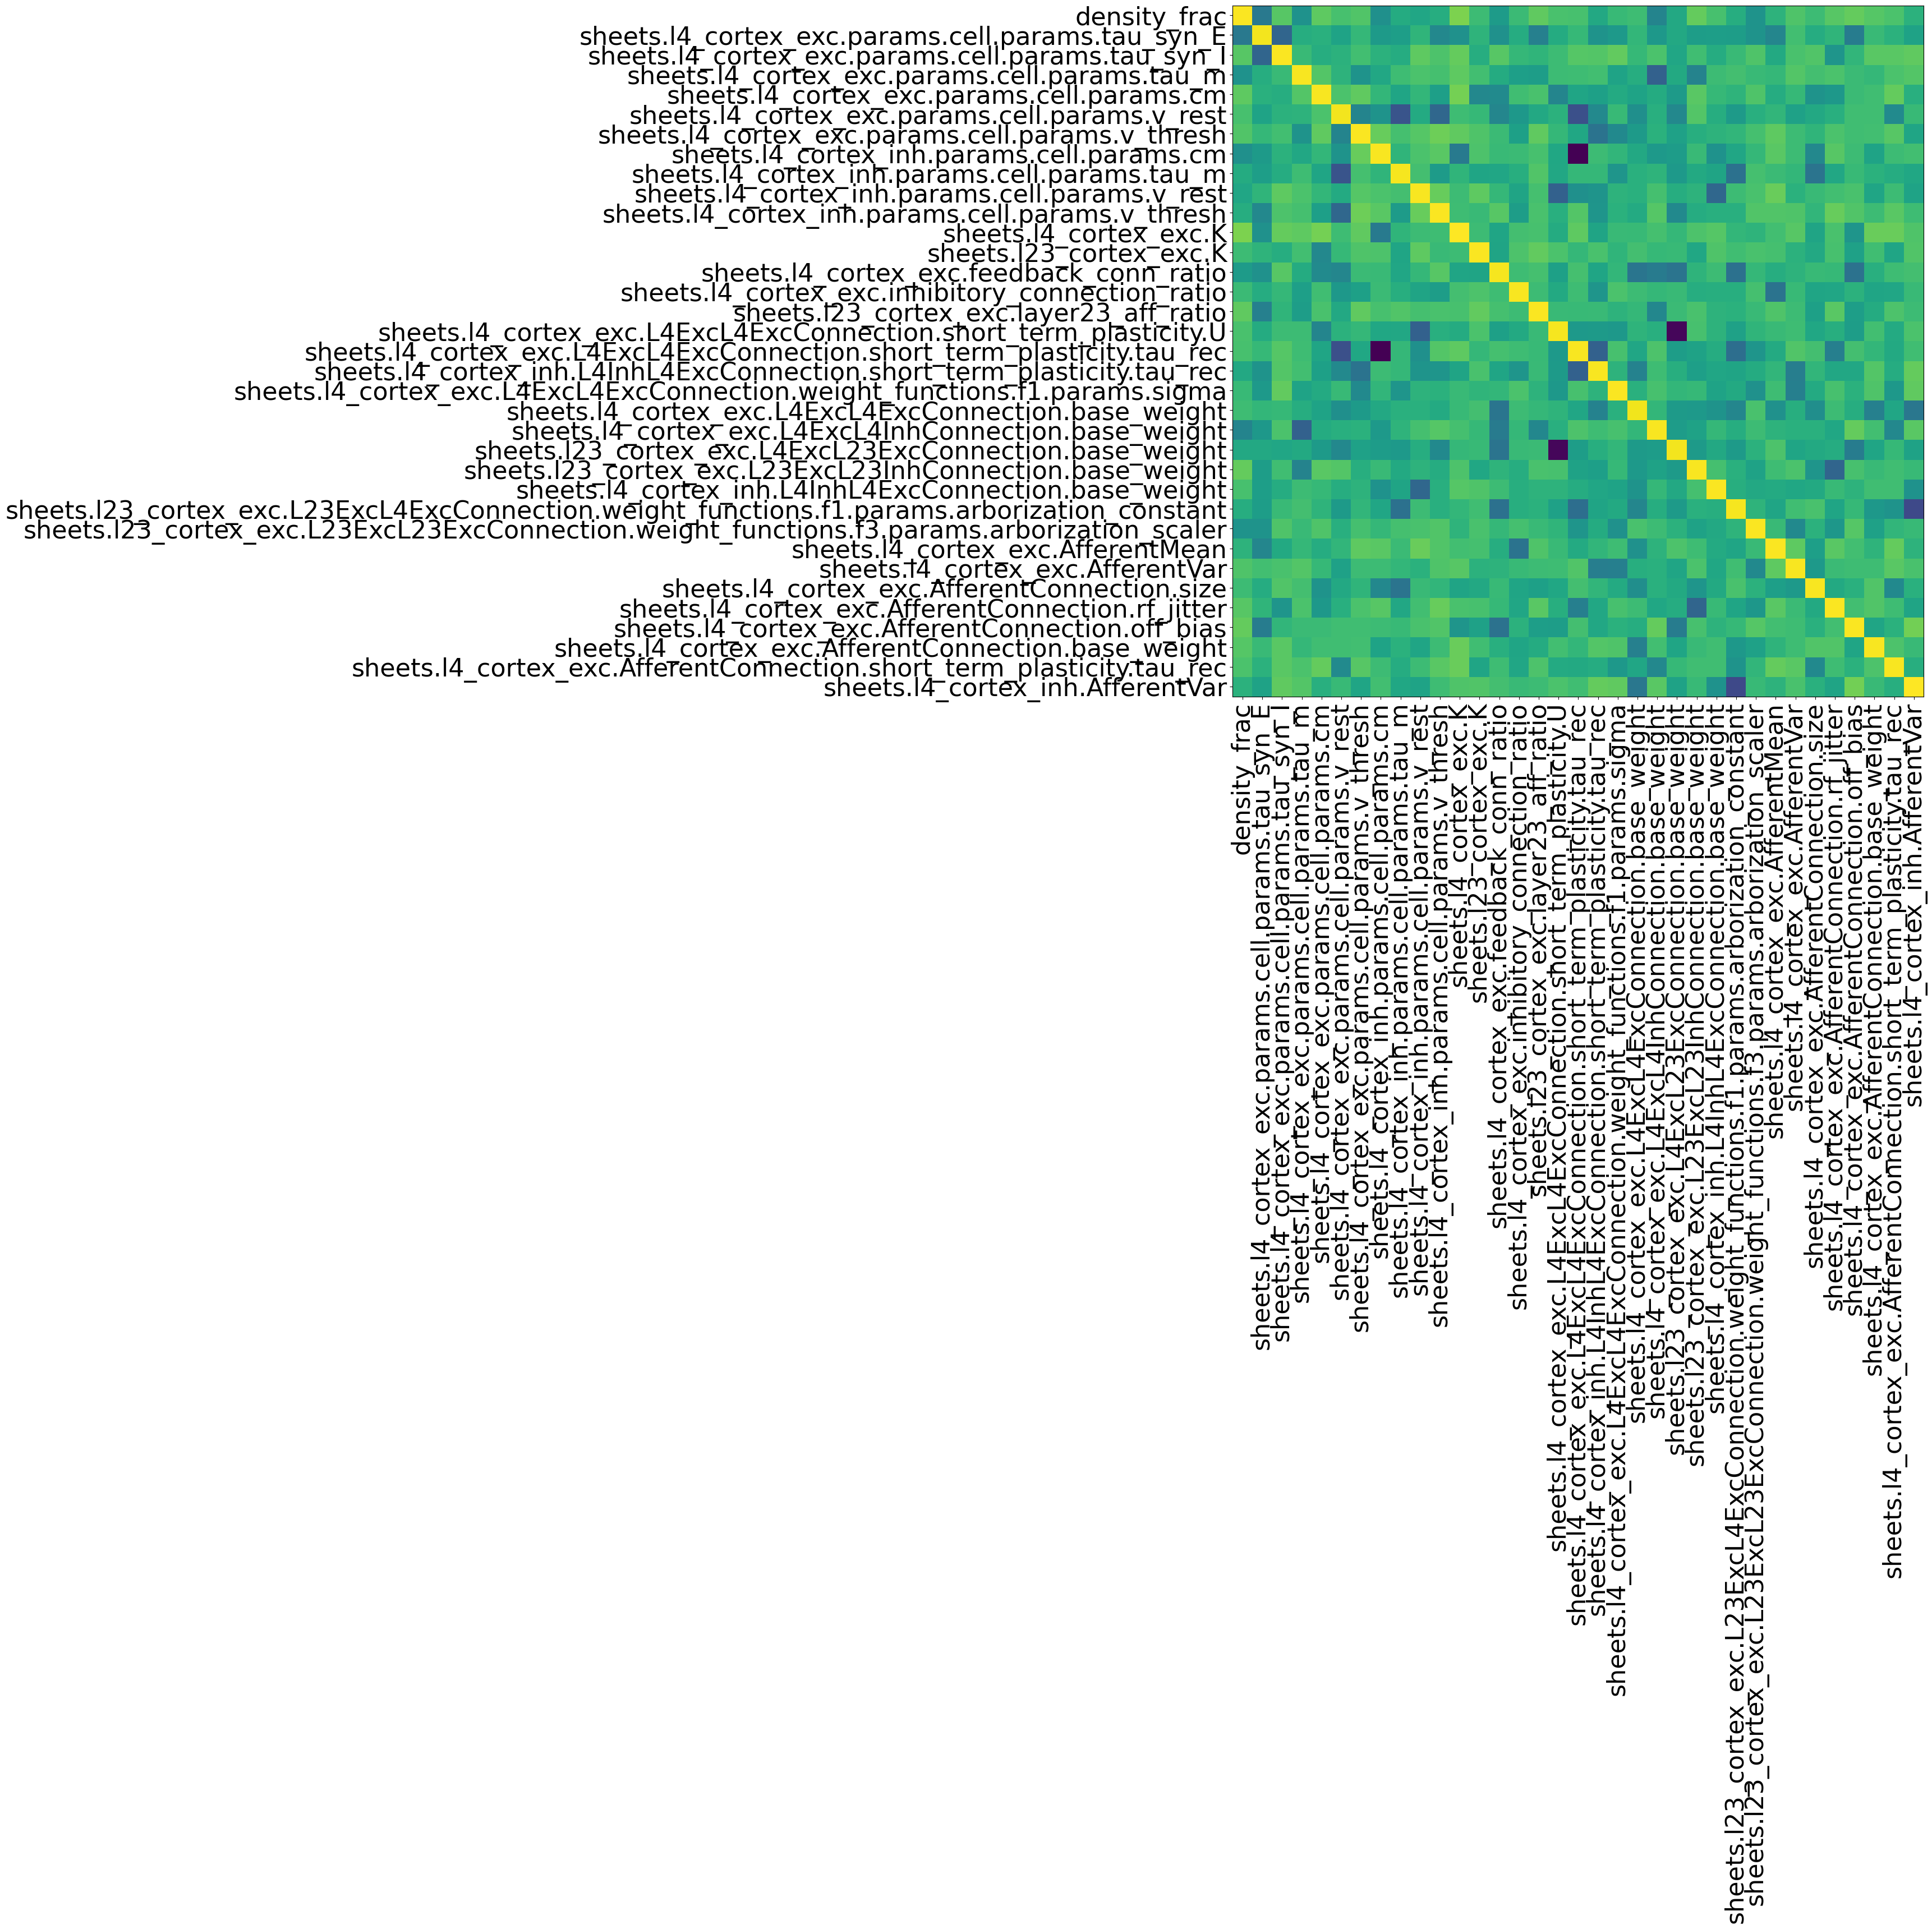

In [54]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(1, figsize=(16, 16))

_im = numpy.log(numpy.abs(run["CMA_es"].C))
ax.imshow(_im, vmin=_im.min(), vmax=_im.max())

ax.set_xticks(range(n_params))
ax.set_xticklabels(param_names, rotation=90)

ax.set_yticks(range(n_params))
ax.set_yticklabels(param_names)

plt.savefig(f"./{optimization_folder}/covariance_matrix.png", dpi=100, bbox_inches="tight", transparent=True)
plt.show()

# Plot exploration of the parameter space

/tmp/ipykernel_289408/243295448.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


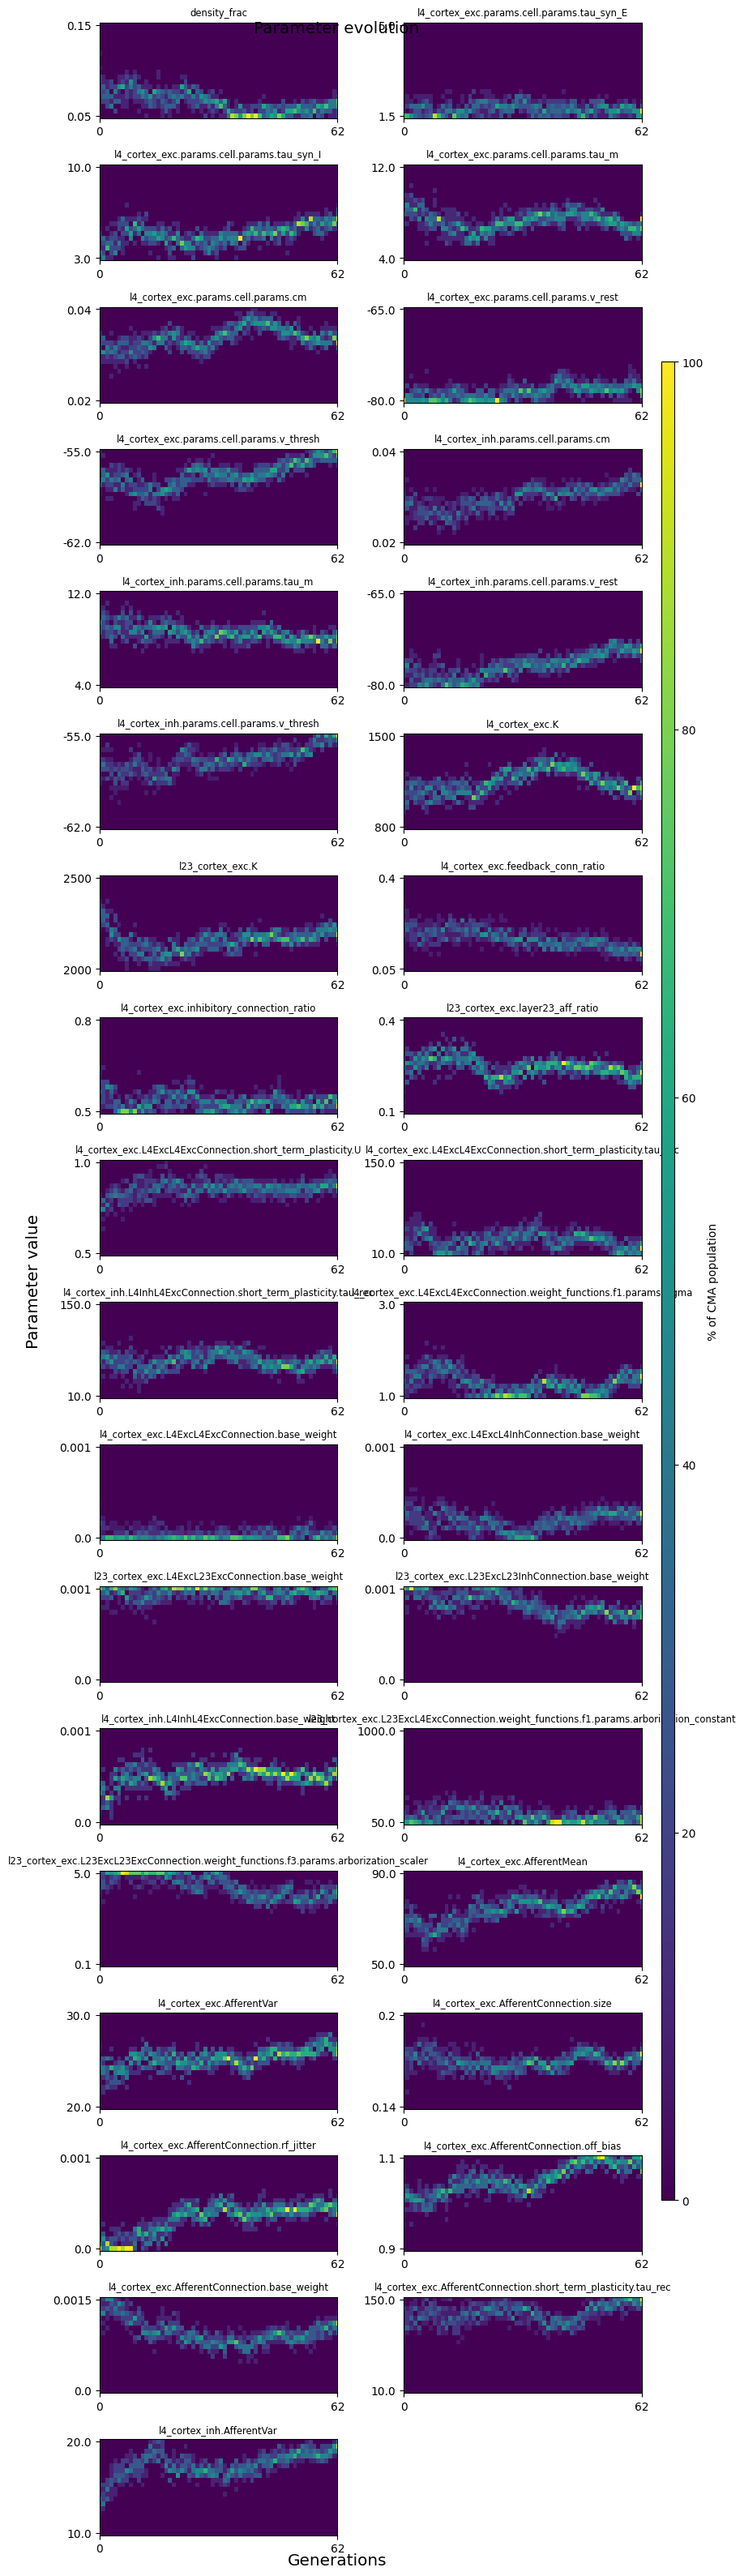

In [55]:
plt.rcParams.update({'font.size': 10})

max_n_gen = run["generation"]
gen_per_bin = 1
pop_size = len(run["population"])
histo_bins = (int(max_n_gen / gen_per_bin), 20)
normalization_factor = gen_per_bin * pop_size

# Get the histograms for all parameters
histograms = {}
for param_index in range(len(run["history"].genealogy_history[1])):
    x = [(ind_idx - 1) // pop_size for ind_idx in run["history"].genealogy_history.keys()]
    y = [ind[param_index] for ind in run["history"].genealogy_history.values()]

    histo_range = [
        [0, max_n_gen],
        [
            params[param_index].bounds[0],
            params[param_index].bounds[1],
        ],
    ]

    h, _, _ = numpy.histogram2d(x, y, bins=histo_bins, range=histo_range)
    normalized_h = h / normalization_factor

    histograms[param_index] = normalized_h

ncols = 2
nrows = math.ceil(len(params) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 1.8 * nrows))
axs = axs.flat

# Plot the histograms
for param_index, param in enumerate(params):
    axs[param_index].imshow(
        100.0 * numpy.flip(histograms[param_index].T, 0),
        aspect="auto",
        interpolation="none",
    )

    axs[param_index].set_title(list(param_names)[param_index].replace("sheets.", ""), size="small")

    x_ticks_pos = [0, int(max_n_gen / gen_per_bin) - 1]
    x_ticks_label = [0, int(max_n_gen / gen_per_bin) * gen_per_bin]
    axs[param_index].set_xticks(x_ticks_pos, x_ticks_label)
    axs[param_index].set_yticks([0, 19], [param.bounds[1], param.bounds[0]])
    axs[param_index].set_xlim(0, int(max_n_gen / gen_per_bin) - 1)

for axs_index in range(len(params), len(axs)):
    axs[axs_index].set_visible(False)

# Add a colorbar common to all subplots
norm = plt_colors.Normalize(vmin=0, vmax=100, clip=False)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(mappable=cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax, label="% of CMA population",)

fig.supxlabel("Generations", size="x-large")
fig.supylabel("Parameter value", size="x-large")

suptitle = "Parameter evolution"
fig.suptitle(suptitle, size="x-large")

plt.tight_layout()

plt.savefig(f"./{optimization_folder}/evo_parameters.png", dpi=100, bbox_inches="tight", transparent=True)
plt.show()